<a href="https://colab.research.google.com/github/fathinah/kipi-machine-learning/blob/main/Fathinah_Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
vaers_df = pd.read_csv(filepath_or_buffer='/content/drive/MyDrive/Bangkit Capstone Project Team/Notebooks/2021VAERSData/2021VAERSDATA.csv', sep=',', encoding = "ISO-8859-1", dtype={
    'RPT_DATE': str,
    'ER_VISIT': str,
    'V_FUNDBY': str,
    'SYMPTOM_TEXT': str
})
vaers_df.columns

Index(['VAERS_ID', 'RECVDATE', 'STATE', 'AGE_YRS', 'CAGE_YR', 'CAGE_MO', 'SEX',
       'RPT_DATE', 'SYMPTOM_TEXT', 'DIED', 'DATEDIED', 'L_THREAT', 'ER_VISIT',
       'HOSPITAL', 'HOSPDAYS', 'X_STAY', 'DISABLE', 'RECOVD', 'VAX_DATE',
       'ONSET_DATE', 'NUMDAYS', 'LAB_DATA', 'V_ADMINBY', 'V_FUNDBY',
       'OTHER_MEDS', 'CUR_ILL', 'HISTORY', 'PRIOR_VAX', 'SPLTTYPE',
       'FORM_VERS', 'TODAYS_DATE', 'BIRTH_DEFECT', 'OFC_VISIT', 'ER_ED_VISIT',
       'ALLERGIES'],
      dtype='object')

1. Which age group experience more symptoms?
2. Why are they die?
3. Any corr between L_THREAT and DIED?

In [132]:
vaers_sym = pd.read_csv(filepath_or_buffer='/content/drive/MyDrive/Bangkit Capstone Project Team/Notebooks/2021VAERSData/2021VAERSSYMPTOMS.csv', sep=',', encoding = "ISO-8859-1")
vaers_sym.columns

Index(['VAERS_ID', 'SYMPTOM1', 'SYMPTOMVERSION1', 'SYMPTOM2',
       'SYMPTOMVERSION2', 'SYMPTOM3', 'SYMPTOMVERSION3', 'SYMPTOM4',
       'SYMPTOMVERSION4', 'SYMPTOM5', 'SYMPTOMVERSION5'],
      dtype='object')

In [133]:
vaers_sym = vaers_sym[['VAERS_ID','SYMPTOM1','SYMPTOM2','SYMPTOM3','SYMPTOM4','SYMPTOM5']]

# Finding top N terms 

In [134]:
concatvalues = np.concatenate([vaers_sym.SYMPTOM1.values,vaers_sym.SYMPTOM2.values, vaers_sym.SYMPTOM3.values, vaers_sym.SYMPTOM4.values,
                               vaers_sym.SYMPTOM5.values])

In [135]:
vaersym = pd.DataFrame(concatvalues, columns=['symptom']).dropna()

In [136]:
import re
vaersym['symptom'] = vaersym['symptom'].apply(lambda x: x.lower())
vaersym['symptom'] = vaersym['symptom'].apply(lambda x: re.sub('[^A-Za-z0-9 ]+', '', x.strip()))

In [137]:
vaersym = pd.DataFrame(vaersym.value_counts()).reset_index()
vaersym.columns = ['symptom','count']

In [138]:
feature = vaersym.head(20)
feature['gejala'] = ['Sakit kepala','demam','menggigil','kelelahan','nyeri','mual/muntah','pusing','nyeri parah','sakit di tempat suntik',
                     'nyeri otot','kemerahanan di tempat suntik','nyeri sendi','sesak napas','gatal-gatal','pembengkakan di tempat suntik',
                     'muntah','ruam','lemah','gatal di tempat suntik','kemerahan']
feature = feature.drop([1,4,6,7,15,16,17, 19])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [140]:
feature2 = vaersym.iloc[[20,21,22,25,26,27,30,31,32,33,35,42,43,47]]
feature2['gejala']=['keringat berlebih','diare', 'kesemutan','biduran','mati rasa', 'limfadenopati','batuk','tremor','detak jatung meningkat','sakit pada dada','bengkak kaki/tangan', 'covid-19','pingsan','sakit leher']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [143]:
feature = feature.append(feature2, ignore_index=True)

In [145]:
feature_all = vaersym.head(50)['symptom']
feature_all

0                       headache
1                        pyrexia
2                         chills
3                        fatigue
4                           pain
5                         nausea
6                      dizziness
7              pain in extremity
8            injection site pain
9                        myalgia
10       injection site erythema
11                    arthralgia
12                      dyspnoea
13                      pruritus
14       injection site swelling
15                      vomiting
16                          rash
17                      asthenia
18       injection site pruritus
19                      erythema
20                 hyperhidrosis
21                     diarrhoea
22                  paraesthesia
23         injection site warmth
24                       malaise
25                     urticaria
26                 hypoaesthesia
27               lymphadenopathy
28              feeling abnormal
29                         death
30        

In [ ]:
print("Input you symptoms:")
input_sym = input("").split(',')
predict(input_sym)

Input you symptoms:
a,b,c,d


# Modelling

In [146]:
vaers_df['label'] = vaers_df[['DIED', 'L_THREAT', 'ER_VISIT', 'HOSPITAL', 'ER_ED_VISIT']].notnull().T.any()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


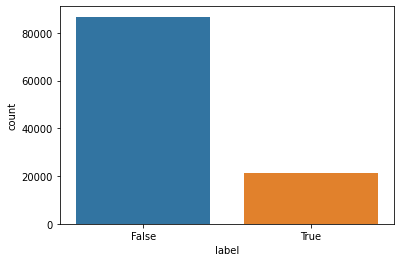

In [147]:
sns.countplot(vaers_df['label'])

In [151]:
X = vaers_sym.fillna('')
X['text']=X['SYMPTOM1']+" "+X['SYMPTOM2']+" "+X['SYMPTOM3']+" "+X['SYMPTOM4']+" "+X['SYMPTOM5']
X = X.drop(['SYMPTOM1','SYMPTOM2','SYMPTOM3','SYMPTOM4','SYMPTOM5'], axis=1)
Z = X.groupby('VAERS_ID')['text'].transform(lambda x:' '.join(x))

In [153]:
X['text']=Z

In [154]:
X = X.drop_duplicates()

In [156]:
X_label = vaers_df[['VAERS_ID','label']]
X = X.merge(X_label, on=['VAERS_ID'], how='inner')

In [158]:
from sklearn.preprocessing import LabelEncoder, Normalizer, StandardScaler, MinMaxScaler, scale
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV, LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
 
import statsmodels.api as sm
 
import tensorflow as tf

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    # tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.RMSprop(1e-4),metrics=['accuracy'])
model.summary()

In [ ]:
num_epochs = 5
history = model.fit(padded, y_train, batch_size=128, epochs=num_epochs, validation_data=(testing_padded, y_test))

In [ ]:
np.quantile(X['text'].apply(lambda y: len(y)), 0.75)